<a href="https://colab.research.google.com/github/JosephBless/models/blob/master/Orange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Orange (Class Note)

Orange: Data Mining Fruitful and Fun

https://orangedatamining.com/

### Installation

In [ ]:
# Install recommendation:
# You can download Win/Mac binary.
# Mac M chip is supported!
# https://orangedatamining.com/download/


# Or you can install by conda or pip.


# Conda installation
# conda config --add channels conda-forge
# conda install orange3

# Pip installation
# pip install orange3

# Execution
# python -m Orange.canvas

### Class Notes

* Data
  * File (tab, URL), Data Table
  * Select Columns (and target), Select Rows
  * Outliers
  * Continuize, Discretize
  * Merge Data, Concatenate
  * Transpose
  * Save Data

* Visualize
  * Box Plot, Distribution
  * Scatter Plot, Linear Projection
  * SelectedData

* Example 1: Hierarchical Clustering with Distance
  * iris dataset
  * Distances, Distance Matrix
  * Hierarchical Clustering
  * SelectedData on figure, Data Table

* Example 2: Titanic Sieve Diagram
  * titanic, Sieve Diagram (A sieve diagram is a graphical method for visualizing the frequencies in a two-way contingency table and comparing them to the expected frequencies under assumption of independence.)

* Example 3: Classification with PCA, Decision Tree
  * iris, PCA, Scatter Plot w/ density, show factors by Data Table
  * iris, Classification Tree, Tree Viewer, Scatter Plot + Box Plot (select a node in Tree Viewer)
  * iris, Rank (Gini, Gain, X^2), Box Plot, Distribution

* Example 4: Painted k-means and Silhouette
  * Paint Data, k-means, Silhouette Plot; On iris data

* Example 5-1: Test & Score
  * Test & Score: (titanic, Tree, kNN, SVM) -> (Test & Score) -> ROC Analysis
* Example 5-2: Test & Score & misclassification data
Test & Score: (iris, Tree, kNN, SVM) -> (Test & Score) -> Confusion Matrix*3 (select misclassified) -> Venn Diagram + Data Table (see selected misclassified data)

* Example 5-3: Prediction with data
  * Predictions

* Example 6: PCA problem
  * titanic, Preprocess w/ and w/o PCA on same Classifier Method (LR), ROC; MDS
  * Explain why PCA does not perform better.

* Example 7: Test on testing data
  * Training and Testing, test on testing data

* Example 8: Rules
  * CN2 Rule and Association Rule

### Workflow Examples

* Orange built-in workflow tutorial
in your Python’s \Lib\site-packages\Orange\canvas\application\workflows

* Orange Youtube channel
https://www.youtube.com/channel/UClKKWBe2SCAEyv7ZNGhIe4g

* Orange workflow screenshot
https://orange.biolab.si/screenshots/
* Orange: Loading your Data
http://orange-visual-programming.readthedocs.io/loading-your-data/index.html

* Orange Visual Programming
https://docs.orange.biolab.si/3/visual-programming/


# Confusion Matrix

https://en.wikipedia.org/wiki/Confusion_matrix

<table>
<tr><th></th><th></th><th colspan="2" style="text-align:center;">Prediction</th></tr>
<tr><th></th><th></th><th>Class 0 (Negative)</th><th>Class 1 (Positive)</th></tr>
<tr><th rowspan="2"> Actual</th><th>Class 0 (Negative)</td><td>True Negative (TN)</th><td>False Positive (FP)</td></tr>
<tr><th>Class 1 (Positive)</th><td>False Negative (FN)</td><td>True Positive (TP)</td></tr>
</table>

$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}, \text{Error Rate} = 1 - \text{Accuracy}$

$\text{Sensitivity} = \frac{TP}{TP+FN}$, how many traget do the model find?

$\text{Specificity} = \frac{TN}{TN+FP}$, how many non-traget do the model find?

$\text{Precision} = \frac{TP}{TP+FP}$, how precision the model can find target?

$\text{Recall} = \frac{TP}{TP+FN}$, sensitivity.

$F_1 = \frac{1}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}}$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = list(map(lambda x: iris.target_names[x], iris.target))
vv_pl_df = iris_df[(iris_df.target == 'virginica') | (iris_df.target == 'versicolor')]
vv_pl_df = vv_pl_df[['petal length (cm)', 'target']]
vv_pl_df

,petal length (cm),target
50,4.7,versicolor
51,4.5,versicolor
52,4.9,versicolor
53,4.0,versicolor
54,4.6,versicolor
...,...,...
145,5.2,virginica
146,5.0,virginica
147,5.2,virginica
148,5.4,virginica


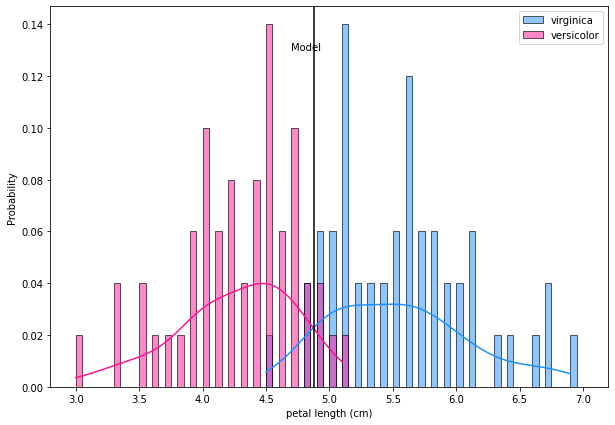

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10,7))
sns.histplot(vv_pl_df[vv_pl_df.target =='virginica']['petal length (cm)'],
             color="dodgerblue", label="virginica", kde=True,
             binrange = (3.0, 7.0), binwidth = 0.05, stat='probability')
sns.histplot(vv_pl_df[vv_pl_df.target =='versicolor']['petal length (cm)'],
             color="deeppink", label="versicolor", kde=True,
             binrange = (3.0, 7.0), binwidth = 0.05, stat='probability')

# model
plt.axvline(x = 4.875, color = 'black')
plt.text(4.7, 0.13, "Model")

plt.legend()
plt.show()

Quesion: If we try to find 'virginica' (i.e., target is virginica, virginica = +1), where are the TP, TN, FP, FN?

Question: If our model is simple a rule that "If $x > 4.875$, then y = +1", is it the best model?

Question: Which of FN and FP is more important?

Queestion: How do we decrease FN

# ROC (receiver operating characteristic) Curve

In [ ]:
vv_pl_df.sort_values(by=['petal length (cm)'], inplace=True)

# for virginica
P = sum(vv_pl_df.target == 'virginica') # count how many 'True's
N = sum(vv_pl_df.target != 'virginica') # count how many not 'True's

roc_li = list()
for model in np.linspace(3.0, 7.0 ,81):
  TP = sum( (vv_pl_df['petal length (cm)'] >= model) & (vv_pl_df.target == 'virginica') )
  FP = sum( (vv_pl_df['petal length (cm)'] >= model) & (vv_pl_df.target != 'virginica') )
  TPR = (TP)/(P)
  FPR = (FP)/(N)
  roc_li.append( [FPR, TPR] )

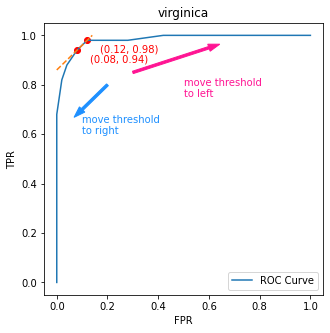

In [ ]:
plt.figure(figsize=(5, 5))
# curve
plt.plot(list(map(lambda x: x[0], roc_li)),
         list(map(lambda x: x[1], roc_li)),
         label = "ROC Curve")

# points
shift = 0.05
plt.scatter([0.12, 0.08], [0.98, 0.94], color="red")
plt.text(0.12+shift, 0.98-shift, "(0.12, 0.98)", color="red")
plt.text(0.08+shift, 0.94-shift, "(0.08, 0.94)", color="red")

# 45 degree
s = 0.14
plt.plot([0, s], [1-s, 1], '--')

# arrow
plt.arrow(0.2,0.8, -0.1,-0.1, width = 0.01, color = "dodgerblue")
plt.arrow(0.3,0.85, +0.3,+0.1, width = 0.01, color = "deeppink")
plt.text(0.1, 0.6, "move threshold\nto right", color="dodgerblue")
plt.text(0.5, 0.75, "move threshold\nto left", color="deeppink")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("virginica")
plt.legend()
plt.show()